In [1]:
import pandas as pd
import numpy as np

# Zadanie
Proszę pobrać dane z https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
names = ['symboling','normalized-losses','make','fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [3]:
data = pd.read_csv(url, names=names, delimiter=",", na_values=["?"])
print(data.shape)

(205, 26)


In [4]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Zadanie
Proszę usunąć kolumny, które nie są numeyczne.

In [5]:
drop_list = ['symboling','make','make','fuel-type', 'aspiration', 'num-of-doors', 
             'body-style', 'drive-wheels', 'engine-location','engine-type','num-of-cylinders','fuel-system']

In [6]:
data=data.drop(drop_list, axis=1)
data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Zadanie
Prosze usunąć brakujące dane.

In [7]:
null_counts = data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [8]:
data=data.dropna()
data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


# Zadanie
Proszę nauczyć wszytkie poznane modele regresji.
Który z nich działa najlepiej?

In [9]:
auto_target = data["price"]
auto_data = data.drop(["price"],axis=1)

In [10]:
auto_data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102.0,5500.0,24,30
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115.0,5500.0,18,22
6,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110.0,5500.0,19,25
8,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140.0,5500.0,17,20
10,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101.0,5800.0,23,29


In [11]:
auto_target.head()

3     13950.0
4     17450.0
6     17710.0
8     23875.0
10    16430.0
Name: price, dtype: float64

In [12]:
y=auto_target
X=auto_data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn import model_selection
seed=123
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6],
                    'elasticnet__alpha': [0.3, 0.4, 1]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X_train, y_train)
grid_1.best_params_

{'elasticnet__alpha': 0.4, 'polynomialfeatures__degree': 4}

In [16]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=True)
grid_2.fit(X_train, y_train)
grid_2.best_params_

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 4}

In [17]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=True)
grid_3.fit(X_train, y_train)
grid_3.best_params_

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: Ill-conditioned matrix (rcond=5.4487e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: Ill-conditioned matrix (rcond=5.77431e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: Ill-conditioned matrix (rcond=5.44462e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: Ill-conditioned matrix (rcond=6.12044e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: Ill-conditioned matrix (rcond=3.24979e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linea

{'polynomialfeatures__degree': 1, 'ridge__alpha': 3}

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=True)
grid_4.fit(X_train, y_train)
print(grid_4.best_params_)
grid_4.best_estimator_

{'polynomialfeatures__degree': 1}


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [26]:
from sklearn.svm import SVR
grid_5 = GridSearchCV(SVR(kernel='rbf'),
                   param_grid={"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                               "gamma": [ 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                    cv=kfold,
                    refit=True)
grid_5.fit(X_train, y_train)
print(grid_5.best_params_)
grid_5.best_estimator_


{'C': 10000, 'gamma': 1e-06}


SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-06,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
from sklearn.ensemble import RandomForestRegressor

grid_6 = GridSearchCV(RandomForestRegressor(n_jobs=-1, max_features= 'sqrt', n_estimators=50, oob_score = True),
                   param_grid={
                   'n_estimators': [100, 150, 300],
                    'max_features': ['auto', 'sqrt', 'log2'],  
                    'max_depth': [ 300, 400, 500, 600]
                   },
                    cv=kfold,
                    refit=True)
grid_6.fit(X_train, y_train)
print(grid_6.best_params_)
grid_6.best_estimator_

{'max_depth': 300, 'max_features': 'log2', 'n_estimators': 100}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=300,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [35]:
from sklearn import  metrics

models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
models.append(('SVR', grid_5.best_estimator_))
models.append(('RFR', grid_6.best_estimator_))
# models.append(('MLP_R', grid_7.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

ElasticNet
R^2: 0.6538310903160813
Explained variance score: 0.6590831610257131
Median absolute error: 1140.202034284419
Mean squared error: 4502433.634469539
Mean absolute errors: 1590.7471221995443
Lasso
R^2: 0.6552662063925525
Explained variance score: 0.6650902189902701
Median absolute error: 1130.4515233890925
Mean squared error: 4483767.848168938
Mean absolute errors: 1577.555660284473
Ridge
R^2: 0.6036890683792977
Explained variance score: 0.6409108156108545
Median absolute error: 1498.999108203221
Mean squared error: 5154604.06269957
Mean absolute errors: 1737.1247385022384
LR
R^2: 0.592633328500062
Explained variance score: 0.6291151038818859
Median absolute error: 1440.649786586131
Mean squared error: 5298400.150949286
Mean absolute errors: 1789.5046613899422
SVR
R^2: 0.8864145615409779
Explained variance score: 0.8916227493866064
Median absolute error: 617.8397094258562
Mean squared error: 1477344.972923283
Mean absolute errors: 903.0206704314176
RFR
R^2: 0.7843415619031879


In [36]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet','Lasso','Ridge','LR','SVR','RFR'])
          #value=['ElasticNet','Lasso','Ridge','LR','SVR','RFR','MLP_R'])
df

,Method,explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2
0,ElasticNet,0.659083,1590.747122,4.502434e+06,1140.202034,0.653831
1,Lasso,0.665090,1577.555660,4.483768e+06,1130.451523,0.655266
2,Ridge,0.640911,1737.124739,5.154604e+06,1498.999108,0.603689
3,LR,0.629115,1789.504661,5.298400e+06,1440.649787,0.592633
4,SVR,0.891623,903.020670,1.477345e+06,617.839709,0.886415
5,RFR,0.799878,1106.271016,2.804954e+06,614.703333,0.784342


In [25]:
# metrics.r2_score(y, grid_5.best_estimator_.predict(X) ) 



['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0.01334391 0.05649408 0.06911907 0.10135909 0.01429032 0.18656782
 0.12176423 0.01484481 0.02349134 0.01524505 0.07184031 0.02385541
 0.09328544 0.19449912]


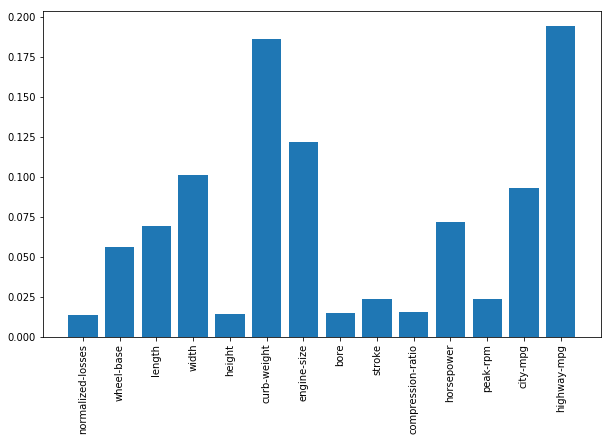

In [39]:
import matplotlib.pyplot as plt
# plot importance scores
names =['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']
print(names)
ticks = [i for i in range(len(names))]
print(ticks)
print(grid_6.best_estimator_.feature_importances_)
plt.figure(figsize=(10,6));
plt.bar(ticks, grid_6.best_estimator_.feature_importances_)
plt.xticks(ticks, names, rotation='vertical')
plt.show()

In [37]:
data.columns.values

array(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'], dtype=object)